In [ ]:
pip install pandas scikit-learn nltk

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv("fake_job_postings.csv")

In [ ]:
# Combine important text columns
df['text'] = df['title'].fillna('') + " " + df['company_profile'].fillna('') + " " + df['description'].fillna('')

In [ ]:
# Remove unnecessary columns
df = df[['text', 'fraudulent']]

In [ ]:
print(df.head())

                                                text  fraudulent
0  Marketing Intern We're Food52, and we've creat...           0
1  Customer Service - Cloud Video Production 90 S...           0
2  Commissioning Machinery Assistant (CMA) Valor ...           0
3  Account Executive - Washington DC Our passion ...           0
4  Bill Review Manager SpotSource Solutions LLC i...           0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters & numbers
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply cleaning function
df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Target Variable
y = df['fraudulent']

# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (14304, 5000)
Test set size: (3576, 5000)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.63      0.77       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576



In [ ]:
def predict_fake_job(job_text):
    job_text_cleaned = clean_text(job_text)  # Clean the text
    job_vectorized = vectorizer.transform([job_text_cleaned])  # Convert to TF-IDF
    prediction = model.predict(job_vectorized)[0]  # Predict
    return "Fake Job Posting" if prediction == 1 else "Real Job Posting"

# Example Job Postings
job1 = """We are hiring for a Data Scientist. No prior experience required. Work from home and earn $10,000 per month. Just send us your bank details!"""
job2 = """Looking for a Senior Software Engineer with 5+ years of experience in Python and Machine Learning. Salary: $80K per year. Apply with your resume."""

print("Job 1 Prediction:", predict_fake_job(job1))
print("Job 2 Prediction:", predict_fake_job(job2))

Job 1 Prediction: Real Job Posting
Job 2 Prediction: Real Job Posting


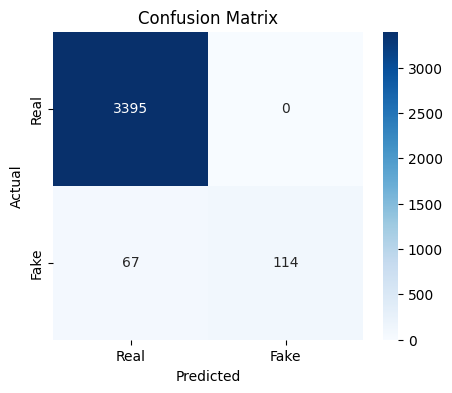

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

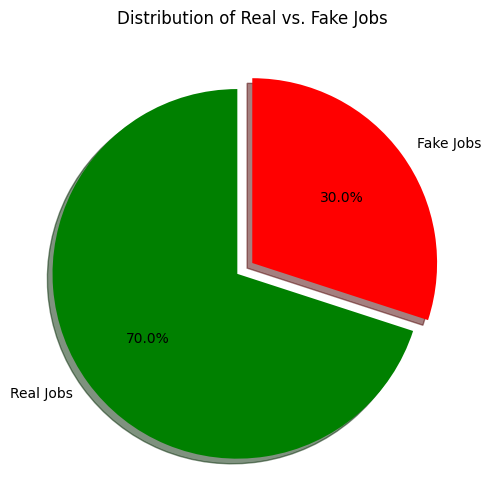

In [ ]:
import matplotlib.pyplot as plt

labels = ['Real Jobs', 'Fake Jobs']
sizes = [70, 30]  # Example percentage distribution
colors = ['green', 'red']
explode = (0.1, 0)  # Highlight Fake Jobs

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Distribution of Real vs. Fake Jobs")
plt.show()